# Bike Sharing - Linear Regression Assignment
# - Adhithia Ramakrishnan adhithia@gmail.com

## <font color=green>Bookmarks to Notebook Sections
<font color=blue>***1. Go to <a href=#no1>Improrting necessary libraries</a><br>
2. Go to <a href=#no2>Reading and Understanding the data</a><br>
3. Go to <a href=#no3>Data Cleaning</a><br>
4. Go to <a href=#no4>Visualising the Data</a><br>
5. Go to <a href=#no5>Data Preparation for Regression</a><br>
6. Go to <a href=#no6>Splitting the Data into Training and Testing Sets</a><br>
7. Go to <a href=#no7>Rescaling the Features (Using MinMax Scaling)</a><br>
8. Go to <a href=#no8>Checking for Correlation using Heatmap</a><br>
9. Go to <a href=#no9>Dividing into X and Y sets for the model building</a><br>
10. Go to <a href=#no10>Building a linear model</a><br>
11. Go to <a href=#no11>Checking VIF</a><br>
12. Go to <a href=#no12>Residual Analysis of the Train Data</a><br>
13. Go to <a href=#no13>Making Predictions Using the Final Model</a><br>
14. Go to <a href=#no14>Model Evaluation</a><br>
15. Go to <a href=#no15>Results and Observations</a><br>***

## <font color=red>1. Importing necessary libraries <a name='no1' />

In [262]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## <font color=red> 2. Reading and understanding the data <a name='no2' />

In [263]:
# Read the data and check the head of the dataset
day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [264]:
day.shape

(730, 16)

In [265]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [266]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### <font color=green>2.1 Observation

-  <font color=blue>The shape of the dataframe is 730x16.
-  There are no null values as observed from the info().
-  There are both categorical and numerical variables in the dataset.

## <font color=red>3. Data Cleaning <a name='no3' />

### <font color=green>3.1 Mapping Categorical Variabeles to their Keys

In [267]:
day['season']=day['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
day['weathersit']=day['weathersit'].map({1:'Clear, Few ...',2:'Mist + Cloudy ...',3:'Light Snow ...',4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})
day['weekday']=day['weekday'].map({0:'Tuesday',1:'Wednesday',2:'Thursday',3:'Friday',4:'Saturday',5:'Sunday',6:'Monday'})
day['mnth']=day['mnth'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
day['yr']=day['yr'].map({0:'2018',1:'2019'})
day['holiday']=day['holiday'].map({0:'Not Holiday',1:'Holiday'})
day['workingday']=day['workingday'].map({1:'Working Day',0:'Not Working Day'})

### <font color=green>3.2 Dropping unnecessary columns

In [268]:
day=day.drop(columns=['dteday','instant','casual','registered'])

### <font color=green>3.2.1 Observation

-  <font color=blue>The above mentioned columns were redundant and not necessary for the regression analysis and hence can be removed.
-  `casual` and `registered` add up to the target variable `cnt`. 
-  `dtedat` is not necessary as it is a datetime value and the month and year data are already present in seperate columns.
-  `instant` is just the counter.    

In [269]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,January,Not Holiday,Monday,Not Working Day,Mist + Cloudy ...,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,January,Not Holiday,Tuesday,Not Working Day,Mist + Cloudy ...,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,January,Not Holiday,Wednesday,Working Day,"Clear, Few ...",8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,January,Not Holiday,Thursday,Working Day,"Clear, Few ...",8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,January,Not Holiday,Friday,Working Day,"Clear, Few ...",9.305237,11.46350,43.6957,12.522300,1600


## <font color=red>4. Visualising the Data <a name='no4' />

### <font color=green>4.1 Visualising Numeric Variables

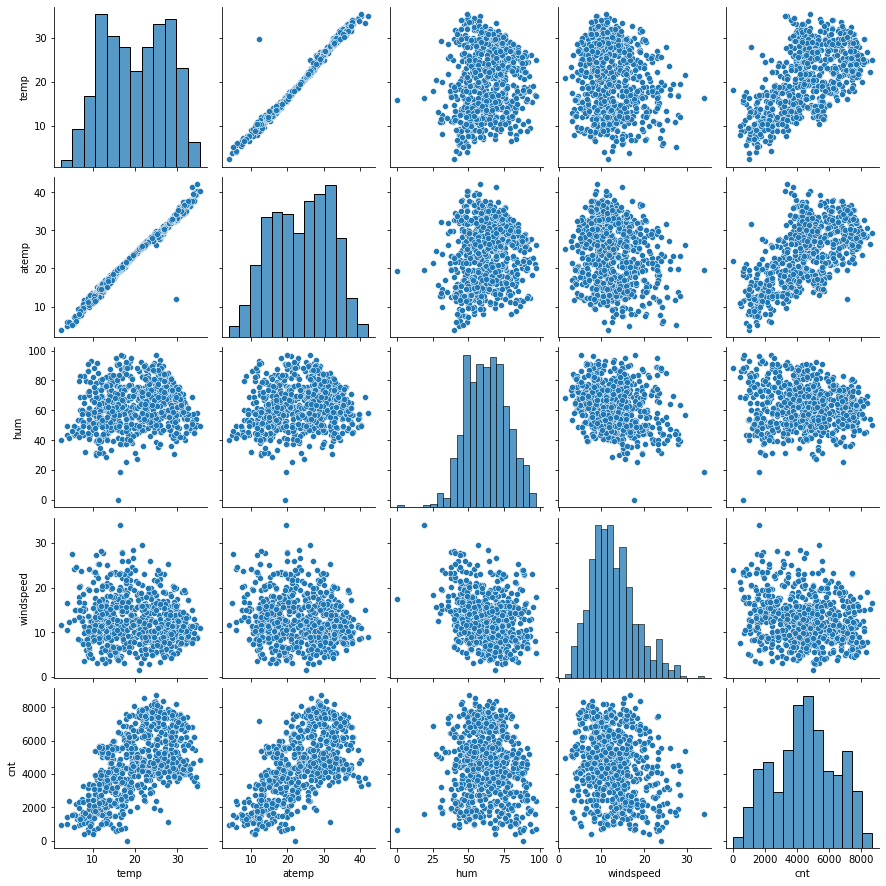

In [270]:
sns.pairplot(day)
plt.show()

### <font color=green>4.1.1 Observation

-  <font color=blue>It is observed that atemp and temp are highly correlated with each other.
-  Also temp and atemp are positively correlated with cnt.
-  windspeed is observed to be negatively correalted with cnt.    

### <font color=green>4.2 Visualising Categorical Variables

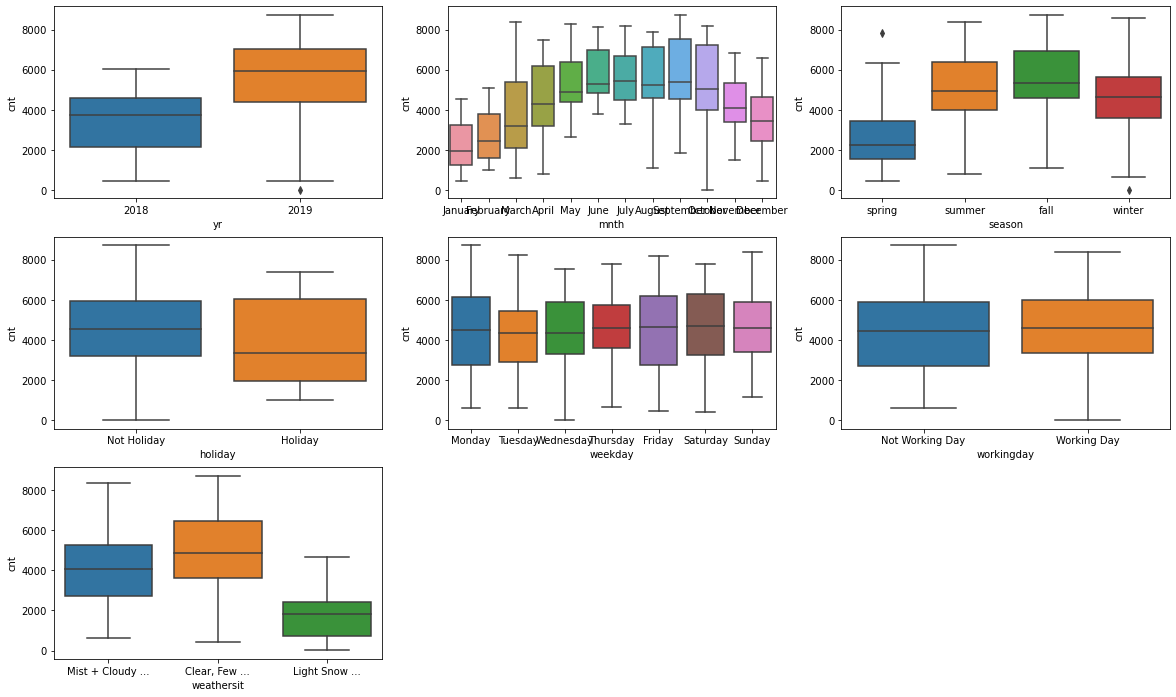

In [271]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = day)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(3,3,3)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.show()

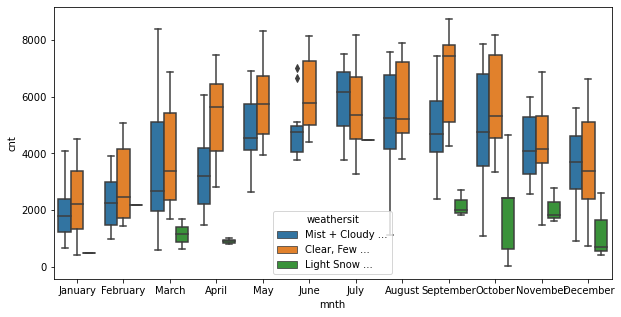

In [272]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'weathersit', data = day)
plt.show()

### <font color=green>4.2.1 Observation

-  <font color=blue>The ***Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist*** and ***Clear, Few clouds, Partly cloudy, Partly cloudy*** weather have a higher median compared to ***Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds***.
-  ***Spring*** has the lowest spread and median compared to ***Fall***, ***Summer*** and ***Winter***.   
-  The median of cnt for the months ***June - October*** is significantly higher than that of the other months.

## <font color=red>5. Data Preparation for Regression <a name='no5' />

### <font color=green>5.1 Mapping binary variables to 1 and 0

In [273]:
day['yr']=day['yr'].map({'2018':0,'2019':1})
day['holiday']=day['holiday'].map({'Not Holiday':0,'Holiday':1})
day['workingday']=day['workingday'].map({'Working Day':1,'Not Working Day':0})

In [274]:
# Check the housing dataframe now
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,0,Mist + Cloudy ...,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,0,Mist + Cloudy ...,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,"Clear, Few ...",8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,"Clear, Few ...",8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,"Clear, Few ...",9.305237,11.46350,43.6957,12.522300,1600


### <font color=green>5.2 Creating Dummy Variables

### <font color=green>5.2.1 Dummy Variables for ***Season***

In [275]:
# Get the dummy variables for the feature and storing it in a new variable - 'status'
status = pd.get_dummies(day['season'], drop_first = True)
day = pd.concat([day, status], axis = 1)
day.drop(['season'], axis = 1, inplace = True)
day.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,January,0,Monday,0,Mist + Cloudy ...,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,January,0,Tuesday,0,Mist + Cloudy ...,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,January,0,Wednesday,1,"Clear, Few ...",8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,January,0,Thursday,1,"Clear, Few ...",8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,January,0,Friday,1,"Clear, Few ...",9.305237,11.46350,43.6957,12.522300,1600,1,0,0


### <font color=green>5.2.1.1 Observation

-  <font color=blue>Since we do not need four columns, we can drop the ***fall*** column, as the type of season can be identified with just the last three columns where — 
    - `000` will correspond to `fall`
    - `100` will correspond to `spring`
    - `010` will correspond to `summer`
    - `011` will correspond to `winter`

### <font color=green>5.2.2 Dummy Variables for ***mnth***

In [276]:
# Get the dummy variables for the feature and storing it in a new variable - 'status'
status = pd.get_dummies(day['mnth'], drop_first = True)
day = pd.concat([day, status], axis = 1)
day.drop(['mnth'], axis = 1, inplace = True)
day.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,December,February,January,July,June,March,May,November,October,September
0,0,0,Monday,0,Mist + Cloudy ...,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Tuesday,0,Mist + Cloudy ...,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Wednesday,1,"Clear, Few ...",8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Thursday,1,"Clear, Few ...",8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Friday,1,"Clear, Few ...",9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


### <font color=green>5.2.2.1 Observation

-  <font color=blue>Since we do not need twelve columns, we can drop the ***April*** column, as the type of furnishing can be identified with just the last eleven columns. 

### <font color=green>5.2.3 Dummy Variables for ***weekday***

In [277]:
# Get the dummy variables for the feature and storing it in a new variable - 'status'
status = pd.get_dummies(day['weekday'], drop_first = True)
day = pd.concat([day, status], axis = 1)
day.drop(['weekday'], axis = 1, inplace = True)
day.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,Mist + Cloudy ...,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,Mist + Cloudy ...,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,"Clear, Few ...",8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,"Clear, Few ...",8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,"Clear, Few ...",9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


### <font color=green>5.2.3.1 Observation

-  <font color=blue>Since we do not need seven columns, we can drop the first column, as the type of ***weekday*** can be identified with just the last six columns. 

### <font color=green>5.2.4 Dummy Variables for ***weathersit***

In [278]:
# Get the dummy variables for the feature and storing it in a new variable - 'status'
status = pd.get_dummies(day['weathersit'], drop_first = True)
day = pd.concat([day, status], axis = 1)
day.drop(['weathersit'], axis = 1, inplace = True)
day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow ...,Mist + Cloudy ...
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


### <font color=green>5.2.4.1 Observation

-  <font color=blue>Since we do not need three columns, we can drop the first column, as the type of ***weathersit*** can be identified with just the last two columns. 

## <font color=red>6. Splitting the Data into Training and Testing Sets <a name='no6' />

In [279]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

## <font color=red>7. Rescaling the Features (Using MinMax Scaling) <a name='no7' />

In [280]:
# Creating the MinMaxScaler Object
scaler = MinMaxScaler()

In [281]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [282]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow ...,Mist + Cloudy ...
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,1,0,0,0,0,0,0,1


In [283]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow ...,Mist + Cloudy ...
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## <font color=red>8. Checking for Correlation using Heatmap <a name='no8' />

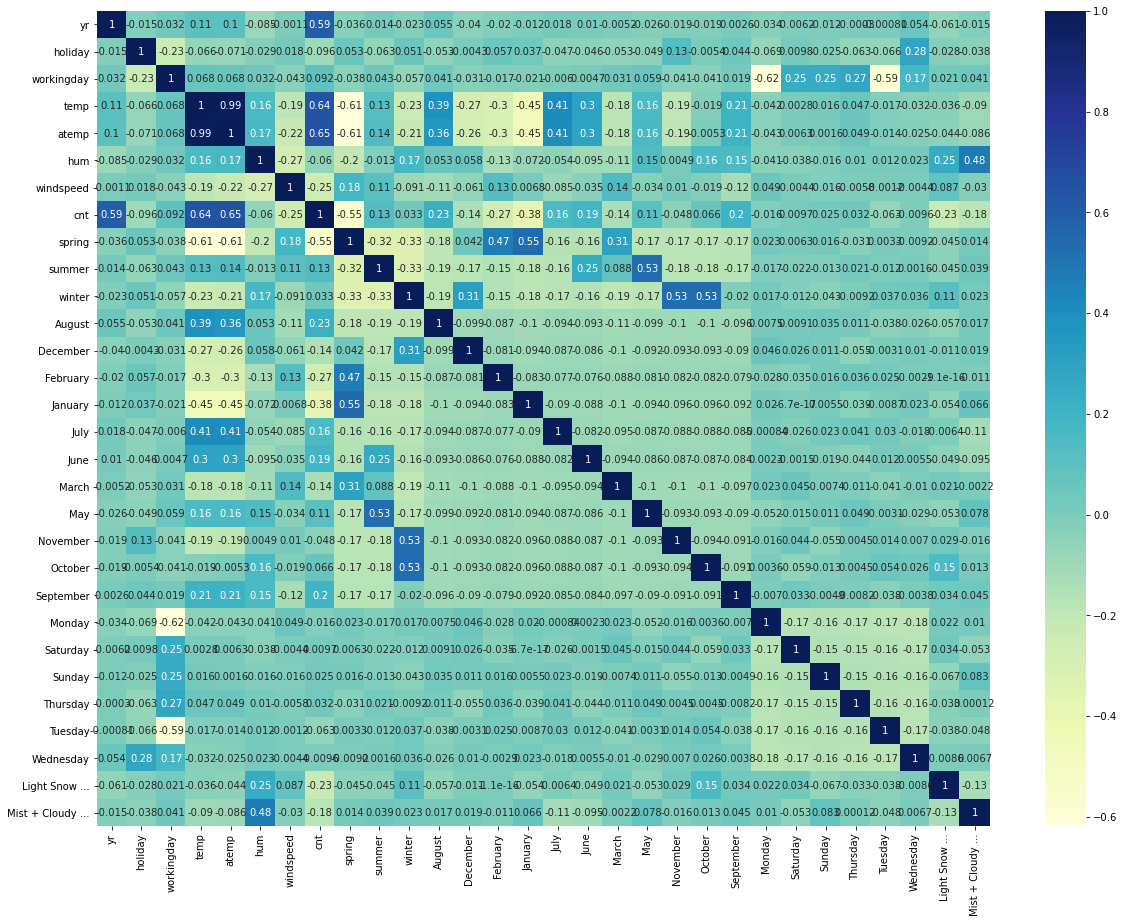

In [284]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### <font color=green>8.1 Observation

-  <font color=blue> `atemp` seems to the correlated to `cnt` the most.
-  Also `temp` and `yr` have high positive correlation while `spring` has a negative correlation.    

## <font color=red>9. Dividing into X and Y sets for the model building <a name='no9' />

In [285]:
y_train = df_train.pop('cnt')
X_train = df_train

## <font color=red>10. Building a linear model <a name='no10' />

<font color=blue>Assumptions:

-  This regression analsysis is done by fitting a regression line through the training data using `statsmodels`.
-  Also I have chosen to add all the variables to the model and remove redundant variables one by one.

### <font color=green>10.1 Adding all the variables to the model

In [286]:
# Check all the columns of the dataframe
day.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Light Snow ...', 'Mist + Cloudy ...'],
      dtype='object')

-  <font color=blue> In `statsmodels`, I have explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [287]:
#Building a linear model
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params

const                0.242943
yr                   0.232208
holiday              0.007249
workingday           0.093522
temp                 0.401322
atemp                0.050628
hum                 -0.151812
windspeed           -0.184388
spring              -0.048580
summer               0.038216
winter               0.105387
August               0.016076
December            -0.045572
February            -0.032176
January             -0.062565
July                -0.039277
June                -0.001704
March                0.001288
May                  0.024691
November            -0.041783
October              0.007695
September            0.081806
Monday               0.098352
Saturday            -0.004017
Sunday               0.005733
Thursday            -0.013575
Tuesday              0.043820
Wednesday           -0.015769
Light Snow ...      -0.256697
Mist + Cloudy ...   -0.061030
dtype: float64

In [288]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          8.42e-181
Time:                        13:24:36   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2429      0.03

### <font color=green>10.2 Observation

-  <font color=blue>Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).
-  To check which variables to drop we need to check the VIF. 

## <font color=red>11. Checking VIF <a name='no11' />

In [289]:
# Calculating the VIFs for the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,86.81
3,temp,67.12
4,atemp,56.09
21,Monday,19.72
25,Tuesday,18.35
7,spring,10.80
9,winter,9.52
8,summer,8.31
18,November,6.80
19,October,6.59


### <font color=green>11.1 Dropping the variable with high VIF and updating the model

-  <font color=blue>It is observed that ***workingday*** has a very high VIF of 86.81. We can remove this variable and update the model again.

In [290]:
X = X_train.drop('workingday', 1)

In [291]:
# Updating the model
X_train_lm = sm.add_constant(X)
lr_f = sm.OLS(y_train, X_train_lm).fit()

In [292]:
print(lr_f.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          8.42e-181
Time:                        13:24:37   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3365      0.04

In [293]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,438.23
3,atemp,383.98
4,hum,37.89
8,winter,11.79
6,spring,11.79
7,summer,6.88
18,October,6.41
17,November,6.09
9,August,6.01
5,windspeed,5.37


### <font color=green>11.2 Dropping the variable with high VIF and updating the model

-  <font color=blue>It is observed that ***temp*** has a very high VIF of 438.23. We can remove this variable and update the model again.

In [294]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('temp', 1,)

In [295]:
# Updating the model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [296]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          4.12e-180
Time:                        13:24:37   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     482   BIC:                            -873.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3547      0.04

In [297]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,37.39
2,atemp,32.51
5,spring,11.79
7,winter,11.77
6,summer,6.88
17,October,6.40
16,November,6.09
8,August,5.44
11,January,5.20
4,windspeed,4.97


### <font color=green>11.3 Dropping the variable with high VIF and updating the model

-  <font color=blue>It is observed that ***hum*** has a very high VIF of 37.39. We can remove this variable and update the model again.

In [298]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('hum', 1)

In [299]:
# Updating the model
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [300]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     102.5
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          3.98e-178
Time:                        13:24:38   Log-Likelihood:                 516.48
No. Observations:                 510   AIC:                            -979.0
Df Residuals:                     483   BIC:                            -864.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2954      0.04

In [301]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,23.93
6,winter,11.56
4,spring,11.27
16,October,5.91
5,summer,5.78
15,November,5.50
7,August,5.10
3,windspeed,4.87
11,July,4.82
10,January,4.58


### <font color=green>11.4 Dropping the variable with high VIF and updating the model

-  <font color=blue>It is observed that ***atemp*** has a very high VIF of 23.93. We can remove this variable and update the model again.

In [302]:
X = X.drop('atemp', 1)

In [303]:
# Updating the model
X_train_lm = sm.add_constant(X)
lr_f = sm.OLS(y_train, X_train_lm).fit()

In [304]:
print(lr_f.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     90.59
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          7.93e-165
Time:                        13:24:39   Log-Likelihood:                 481.41
No. Observations:                 510   AIC:                            -910.8
Df Residuals:                     484   BIC:                            -800.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5094      0.03

In [305]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,winter,11.31
3,spring,10.58
14,November,5.26
15,October,5.24
2,windspeed,4.84
9,January,4.55
4,summer,4.21
7,December,4.14
8,February,3.69
12,March,3.12


### <font color=green>11.5 Dropping the variable with high VIF and updating the model

-  <font color=blue>It is observed that ***winter*** has a very high VIF of 11.31. We can remove this variable and update the model again.

In [306]:
X = X.drop('winter', 1)

In [307]:
# Updating the model
X_train_lm = sm.add_constant(X)
lr_f = sm.OLS(y_train, X_train_lm).fit()

In [308]:
print(lr_f.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     92.88
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          2.79e-164
Time:                        13:24:39   Log-Likelihood:                 477.64
No. Observations:                 510   AIC:                            -905.3
Df Residuals:                     485   BIC:                            -799.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5396      0.03

In [309]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,spring,7.56
2,windspeed,4.82
4,summer,3.96
8,January,3.71
7,February,3.06
11,March,2.67
0,yr,2.01
21,Wednesday,1.98
16,Monday,1.92
20,Tuesday,1.84


### <font color=green>11.6 Dropping the variable with high VIF and updating the model

-  <font color=blue>It is observed that ***spring*** has a very high VIF of 7.56. We can remove this variable and update the model again.

In [310]:
X = X.drop('spring', 1)

In [311]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_f = sm.OLS(y_train, X_train_lm).fit()

In [312]:
print(lr_f.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     90.89
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          1.28e-159
Time:                        13:24:39   Log-Likelihood:                 463.83
No. Observations:                 510   AIC:                            -879.7
Df Residuals:                     486   BIC:                            -778.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4680      0.03

In [313]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.46
3,summer,3.22
0,yr,2.00
20,Wednesday,1.98
15,Monday,1.91
19,Tuesday,1.82
13,October,1.76
16,Saturday,1.76
11,May,1.76
18,Thursday,1.75


### <font color=green>11.7 Observation

-  <font color=blue>Now it is observed that, the VIFs are within an acceptable range. But there are a few variables whose p values are still insignificant.

### <font color=green>11.8 Dropping the variable with high p-value and updating the model

-  <font color=blue>It is observed that ***Monday*** has a very high p-value of 0.922. We can remove this variable and update the model again.

In [314]:
X = X.drop('Monday', 1)

In [315]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_f = sm.OLS(y_train, X_train_lm).fit()

In [316]:
print(lr_f.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     95.21
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          1.31e-160
Time:                        13:24:40   Log-Likelihood:                 463.83
No. Observations:                 510   AIC:                            -881.7
Df Residuals:                     487   BIC:                            -784.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4687      0.03

In [317]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.36
3,summer,3.04
0,yr,2.00
11,May,1.76
21,Mist + Cloudy ...,1.63
13,October,1.58
7,January,1.57
12,November,1.57
19,Wednesday,1.57
6,February,1.55


### <font color=green>11.9 Dropping the variable with high p-value and updating the model

-  <font color=blue>It is observed that ***Saturday*** has a very high p-value of 0.855. We can remove this variable and update the model again.

In [318]:
X = X.drop('Saturday', 1)

In [319]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_f = sm.OLS(y_train, X_train_lm).fit()

In [320]:
print(lr_f.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     99.94
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          1.31e-161
Time:                        13:24:41   Log-Likelihood:                 463.81
No. Observations:                 510   AIC:                            -883.6
Df Residuals:                     488   BIC:                            -790.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4679      0.03

In [321]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.35
3,summer,2.98
0,yr,2.00
11,May,1.74
20,Mist + Cloudy ...,1.62
13,October,1.54
6,February,1.51
7,January,1.51
12,November,1.50
10,March,1.47


### <font color=green>11.10 Dropping the variable with high p-value and updating the model

-  <font color=blue>It is observed that ***Sunday*** has a very high p-value of 0.686. We can remove this variable and update the model again.

In [322]:
X = X.drop('Sunday', 1)

In [323]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_f = sm.OLS(y_train, X_train_lm).fit()

In [324]:
print(lr_f.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     105.1
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          1.37e-162
Time:                        13:24:41   Log-Likelihood:                 463.72
No. Observations:                 510   AIC:                            -885.4
Df Residuals:                     489   BIC:                            -796.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4694      0.03

In [325]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.35
3,summer,2.96
0,yr,2.00
11,May,1.74
19,Mist + Cloudy ...,1.61
13,October,1.51
6,February,1.49
7,January,1.49
12,November,1.48
10,March,1.46


### <font color=green>11.11 Dropping the variable with high p-value and updating the model

-  <font color=blue>It is observed that ***November*** has a very high p-value of 0.636. We can remove this variable and update the model again.

In [326]:
X = X.drop('November', 1)

In [327]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_f = sm.OLS(y_train, X_train_lm).fit()

In [328]:
print(lr_f.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     110.8
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          1.43e-163
Time:                        13:24:42   Log-Likelihood:                 463.61
No. Observations:                 510   AIC:                            -887.2
Df Residuals:                     490   BIC:                            -802.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4812      0.01

In [329]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.61
3,summer,2.68
0,yr,1.93
11,May,1.74
18,Mist + Cloudy ...,1.56
10,March,1.36
12,October,1.35
16,Wednesday,1.35
7,January,1.34
6,February,1.33


### <font color=green>11.12 Dropping the variable with high p-value and updating the model

-  <font color=blue>It is observed that ***Thursday*** has a very high p-value of 0.404. We can remove this variable and update the model again.

In [330]:
X = X.drop('Thursday', 1)

In [331]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_f = sm.OLS(y_train, X_train_lm).fit()

In [332]:
print(lr_f.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     117.0
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          1.85e-164
Time:                        13:24:43   Log-Likelihood:                 463.24
No. Observations:                 510   AIC:                            -888.5
Df Residuals:                     491   BIC:                            -808.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4787      0.01

In [333]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.57
3,summer,2.67
0,yr,1.93
11,May,1.73
17,Mist + Cloudy ...,1.56
10,March,1.35
12,October,1.34
7,January,1.33
6,February,1.32
15,Wednesday,1.31


### <font color=green>11.13 Dropping the variable with high p-value and updating the model

-  <font color=blue>It is observed that ***Wednesday*** has a very high p-value of 0.195. We can remove this variable and update the model again.

In [334]:
X = X.drop('Wednesday', 1)

In [335]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_f = sm.OLS(y_train, X_train_lm).fit()

In [336]:
print(lr_f.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     123.6
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          3.77e-165
Time:                        13:24:43   Log-Likelihood:                 462.37
No. Observations:                 510   AIC:                            -888.7
Df Residuals:                     492   BIC:                            -812.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4767      0.01

In [337]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.57
3,summer,2.66
0,yr,1.91
11,May,1.73
16,Mist + Cloudy ...,1.56
10,March,1.35
7,January,1.33
6,February,1.32
12,October,1.32
9,June,1.30


### <font color=green>11.14 Observation

-  <font color=blue> At this point both the ***VIF values*** and ***p-values*** of all the variables are ***significant*** and well under limits. We can use this model and progress further with the analysis. 

## <font color=red>12. Residual Analysis of the train data <a name='no12' />

<font color=blue>Assumption check:
-  We have to check if the error terms are  normally distributed (major assumption of linear regression)

In [338]:
y_train_cnt = lr_f.predict(X_train_lm)
res = (y_train - y_train_cnt)

Text(0.5, 0, 'Errors')

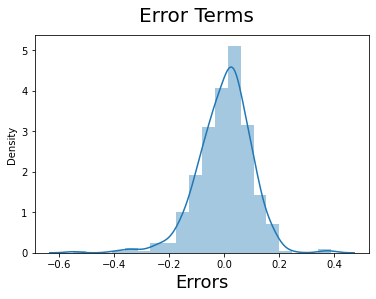

In [339]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### <font color=green>12.1 Observation

-  <font color=blue> It is obersved from the histogram that the error terms are ***normally distributed*** and spread across ***mean 0***. There are ***no noticable patterns*** and the assumption holds true.

## <font color=red>13. Making Predictions Using the Final Model <a name='no13' />

### <font color=green>13.1 Applying the train scaling on the test sets

In [340]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [341]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow ...,Mist + Cloudy ...
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.118721,0.164384,0.178082,0.164384,0.146119,0.127854,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.324202,0.371472,0.383458,0.371472,0.354034,0.334692,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### <font color=green>13.2 Dividing into X_test and y_test

In [342]:
y_test = df_test.pop('cnt')
X_test = df_test

### <font color=green>13.3 Adding constant variable to the test set

In [343]:
# Adding constant variable to test dataframe
X_test_f = sm.add_constant(X_test)

### <font color=green>13.4 Dropping variables that were removed using the above analysis

In [344]:
# Creating X_test_f dataframe by dropping variables from X_test_f
X_test_f = X_test_f.drop(["workingday", "temp", "hum","atemp","winter","spring","Monday","Saturday","Sunday","November","Thursday","Wednesday"], axis = 1)

### <font color=green>13.5 Predicting using the model

In [345]:
# Making predictions using the fourth model
y_pred_f = lr_f.predict(X_test_f)

## <font color=red>14. Model Evaluation <a name='no14' />

Text(0, 0.5, 'y_pred')

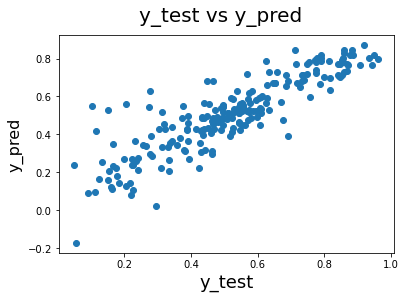

In [346]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_f)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### <font color=green>14.1 Checking the R2 Value of the test set

In [347]:
r2_score(y_true=y_test,y_pred=y_pred_f)

0.7640743252880875

### <font color=green>14.2 Checking the RMSE Value of the test set

In [348]:
#Taking the square root of the MSE
np.sqrt(mean_squared_error(y_test, y_pred_f))

0.10585594260051324

### <font color=green>14.3 Evaluation observation

-  <font color=blue> The ***R2 Value*** of Test set is only 0.05 lower from that of the Train Set R2 value. 
-  The ***RMSE*** Value is also very low ***(0.1059)***

## <font color=red>15. Results and Observations <a name='no15' />

### <font color=green> 15.1 Business Goal and Model

The equation of the best fitted line is:

$ cnt = 0.4767 + 0.2477  \times  yr - 0.0923  \times  holiday - 0.1899 \times windspeed + 0.0370 \times summer + 0.1338 \times August - 0.0755 \times December - 0.1780 \times February - 0.2457 \times January + 0.1085 \times July + 0.1130 \times June - 0.0723 \times March + 0.0733 \times May + 0.1041 \times October + 0.1707 \times September - 0.0533 \times Tuesday - 0.3002 \times  Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -0.0864 \times Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist $


-  <font color=blue>The R2 Score value of the Train Set was ***0.81*** and that of the Test Set was ***0.76***.
-  No patterns or correlations were observed in the error distribution.
-  All the assumptions of linear regression hold true.

### <font color=green>15.2 Business Answers

-  <font color=blue>The list of variablest that are significant in predicting the demand for shared bikes and how well they describe (Coefficients) are provided below:<br>
0. `constant` 0.4767 <br>
1. `yr` 0.2477 <br> 
2. `holiday` -0.0923 <br>
3. `windspeed` -0.1899 <br>
4. `summer` 0.0370 <br>
5. `August` 0.1338 <br>
6. `December` -0.0755 <br>
7. `February` -0.1780 <br>
8. `January` -0.2457 <br>
9. `July` 0.1085 <br>
10. `June` 0.1130 <br>
11. `March` -0.0723 <br>
12. `May` 0.0733 <br>
13. `October`0.1041 <br>
14. `September`0.1707 <br>
15. `Tuesday`-0.0533 <br>
16. `𝐿𝑖𝑔ℎ𝑡𝑆𝑛𝑜𝑤,𝐿𝑖𝑔ℎ𝑡𝑅𝑎𝑖𝑛+𝑇ℎ𝑢𝑛𝑑𝑒𝑟𝑠𝑡𝑜𝑟𝑚+𝑆𝑐𝑎𝑡𝑡𝑒𝑟𝑒𝑑𝑐𝑙𝑜𝑢𝑑𝑠,𝐿𝑖𝑔ℎ𝑡𝑅𝑎𝑖𝑛+𝑆𝑐𝑎𝑡𝑡𝑒𝑟𝑒𝑑𝑐𝑙𝑜𝑢𝑑𝑠`-0.3002 <br>
17. `𝑀𝑖𝑠𝑡+𝐶𝑙𝑜𝑢𝑑𝑦,𝑀𝑖𝑠𝑡+𝐵𝑟𝑜𝑘𝑒𝑛𝑐𝑙𝑜𝑢𝑑𝑠,𝑀𝑖𝑠𝑡+𝐹𝑒𝑤𝑐𝑙𝑜𝑢𝑑𝑠,𝑀𝑖𝑠𝑡` -0.0864 <br>

## <font color=red> END OF ANALYSIS